In [ ]:
from src.ft_transformer import CustomerFTTransformer
from s

c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Use Original Data

In [2]:
ft_transformer = CustomerFTTransformer()
ft_transformer.format_dataframe()
ft_transformer.preprocess(use_smote=False)
ft_transformer.set_feautres_processed()
ft_transformer.set_tablar_dataset()
ft_transformer.set_model_config()

Encoded gender: [0, 1]
Encoded primary_diagnosis: [0, 1, 2, 3, 4]
Encoded discharge_to: [0, 1, 2, 3]
=== Feature Encoding Complete ===
Numerical features: ['age', 'num_procedures', 'days_in_hospital', 'comorbidity_score']
Categorical features (encoded): ['gender', 'primary_diagnosis', 'discharge_to']

Sample of encoded data:
  gender primary_diagnosis discharge_to
0      1                 2            1
1      0                 0            2
2      1                 1            0
3      1                 0            3
4      1                 1            2
=== PREPROCESS DEBUG INFO ===
Before sampling - Training set size: 4000
Before sampling - Class distribution: {0: 3234, 1: 766}
Before sampling - X_num_train shape: (4000, 4)
Before sampling - X_cat_train shape: (4000, 3)
📝 No sampling method applied
train_df_train_csv shape after DataFrame creation: (4000, 8)


100%|██████████| 3/3 [00:00<?, ?it/s]

Final train_df_train_csv_processed shape: (4000, 7)
Final test_df_train_csv_processed shape: (1000, 7)
=== END PREPROCESS DEBUG ===
categorical features (cols): ['cat_0', 'cat_1', 'cat_2']
categorical features (array): 3
numerical features (cols): ['num_0', 'num_1', 'num_2', 'num_3']
numerical features (array): 4



c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\ShiShiuan\Desktop\機器學習與人

In [3]:
ft_transformer.check_class_distribution(ft_transformer.train_df_train_csv_processed, 'target')

=== Class Distribution Analysis ===
Class distribution:
  Class 0: 3234 samples (80.85%)
  Class 1: 766 samples (19.15%)
Imbalance ratio: 4.22
⚠️  Dataset is imbalanced.


(target
 0    3234
 1     766
 Name: count, dtype: int64,
 4.221932114882507)

In [4]:
ft_transformer.train_model(num_epochs=100, model_name='ft_transformer_model')

Using standard CrossEntropyLoss (no class weights)


Model saved as ./models/ft_transformer_model


Test Accuracy: 0.7700

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       826
           1       0.25      0.16      0.20       174

    accuracy                           0.77      1000
   macro avg       0.54      0.53      0.53      1000
weighted avg       0.73      0.77      0.75      1000


Confusion Matrix:
[[742  84]
 [146  28]]

Detailed Confusion Matrix:
Predicted:       0       1
Actual 0:     742      84
Actual 1:     146      28


c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\src\ft_transformer.py:394: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(f"./models/{model_name}

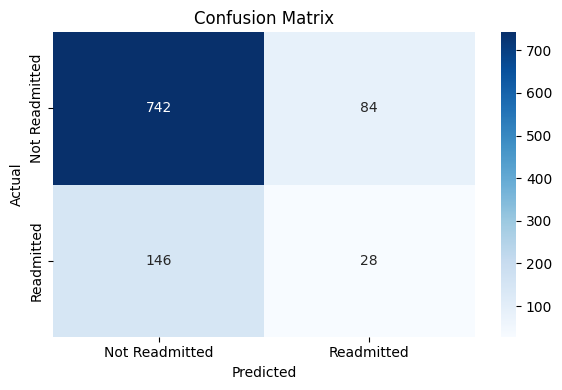

混淆矩陣圖表已保存為 'confusion_matrix.png'


(0.77,
 array([[742,  84],
        [146,  28]], dtype=int64))

<Figure size 640x480 with 0 Axes>

In [5]:
ft_transformer.evaluate_model(model_name='ft_transformer_model')

# Over Sampling

## SMOTE

In [28]:
ft_transformer_smote = CustomerFTTransformer()
ft_transformer_smote.format_dataframe()
ft_transformer_smote.preprocess(use_smote=True, smote_method='smote')
ft_transformer_smote.set_feautres_processed()
ft_transformer_smote.set_tablar_dataset()
ft_transformer_smote.set_model_config()

Encoded gender: [0, 1]
Encoded primary_diagnosis: [0, 1, 2, 3, 4]
Encoded discharge_to: [0, 1, 2, 3]
Encoded num_procedures: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Encoded days_in_hospital: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Encoded comorbidity_score: [0, 1, 2, 3, 4]
=== Feature Encoding Complete ===
Numerical features: ['age']
Categorical features (encoded): ['gender', 'primary_diagnosis', 'discharge_to', 'num_procedures', 'days_in_hospital', 'comorbidity_score']

Sample of encoded data:
  gender primary_diagnosis discharge_to num_procedures days_in_hospital  \
0      1                 2            1              1                1   
1      0                 0            2              2               12   
2      1                 1            0              1                6   
3      1                 0            3              9                1   
4      1                 1            2              6                3   

  comorbidity_score  
0                 1  
1      

100%|██████████| 6/6 [00:00<00:00, 382.31it/s]

Final train_df_train_csv_processed shape: (6468, 7)
Final test_df_train_csv_processed shape: (1000, 7)
=== END PREPROCESS DEBUG ===
categorical features (cols): ['cat_0', 'cat_1', 'cat_2', 'cat_3', 'cat_4', 'cat_5']
categorical features (array): 6
numerical features (cols): ['num_0']
numerical features (array): 1



c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\ShiShiuan\Desktop\機器學習與人

In [29]:
ft_transformer_smote.check_class_distribution(ft_transformer_smote.train_df_train_csv_processed, 'target')

=== Class Distribution Analysis ===
Class distribution:
  Class 0: 3234 samples (50.00%)
  Class 1: 3234 samples (50.00%)
Imbalance ratio: 1.00
✅ Dataset is relatively balanced.


(target
 0    3234
 1    3234
 Name: count, dtype: int64,
 1.0)

In [32]:
ft_transformer_smote.train_model(num_epochs=500, model_name='ft_transformer_model_smote.pth', use_class_weight=False)

Using standard CrossEntropyLoss (no class weights)


Model saved as ./models/ft_transformer_model_smote.pth


c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\src\ft_transformer.py:384: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(f"./models/{model_name}

Test Accuracy: 0.4160

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.39      0.52       826
           1       0.16      0.55      0.25       174

    accuracy                           0.42      1000
   macro avg       0.48      0.47      0.39      1000
weighted avg       0.69      0.42      0.47      1000


Confusion Matrix:
[[320 506]
 [ 78  96]]

Detailed Confusion Matrix:
Predicted:       0       1
Actual 0:     320     506
Actual 1:      78      96


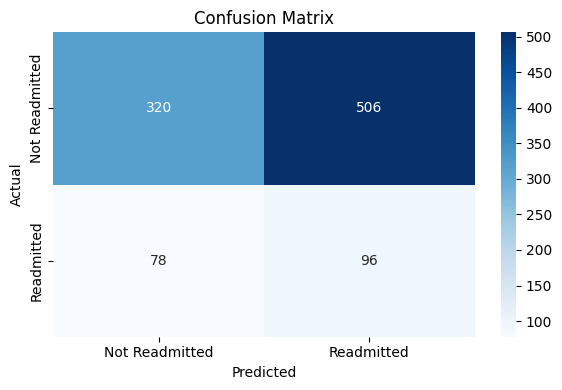

混淆矩陣圖表已保存為 'confusion_matrix.png'


(0.416,
 array([[320, 506],
        [ 78,  96]], dtype=int64))

<Figure size 640x480 with 0 Axes>

In [39]:
ft_transformer_smote.evaluate_model(model_name='ft_transformer_model_smote.pth')

## SMOTE-NC

In [6]:
ft_transformer_smote_nc = CustomerFTTransformer()
ft_transformer_smote_nc.format_dataframe()
ft_transformer_smote_nc.preprocess(use_smote=True, use_under_sampling=False, smote_method='smotenc')
ft_transformer_smote_nc.set_feautres_processed()
ft_transformer_smote_nc.set_tablar_dataset()
ft_transformer_smote_nc.set_model_config()

Encoded gender: [0, 1]
Encoded primary_diagnosis: [0, 1, 2, 3, 4]
Encoded discharge_to: [0, 1, 2, 3]
=== Feature Encoding Complete ===
Numerical features: ['age', 'num_procedures', 'days_in_hospital', 'comorbidity_score']
Categorical features (encoded): ['gender', 'primary_diagnosis', 'discharge_to']

Sample of encoded data:
  gender primary_diagnosis discharge_to
0      1                 2            1
1      0                 0            2
2      1                 1            0
3      1                 0            3
4      1                 1            2
🔄 Applying SMOTE with method: smotenc
Applying SMOTENC to handle class imbalance...
Original class distribution: {0: 3234, 1: 766}
Using SMOTENC for mixed data types...
Numerical features shape: (4000, 4)
Categorical features shape: (4000, 3)
Categorical feature indices: [4, 5, 6]
Combined features shape: (4000, 7)
After SMOTENC class distribution: {0: 3234, 1: 3234}
Training set size: 4000 -> 6468
After SMOTE - Training set size

100%|██████████| 3/3 [00:00<?, ?it/s]

Final train_df_train_csv_processed shape: (6468, 7)
Final test_df_train_csv_processed shape: (1000, 7)
=== END PREPROCESS DEBUG ===
categorical features (cols): ['cat_0', 'cat_1', 'cat_2']
categorical features (array): 3
numerical features (cols): ['num_0', 'num_1', 'num_2', 'num_3']
numerical features (array): 4



c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\ShiShiuan\Desktop\機器學習與人

In [7]:
ft_transformer_smote_nc.check_class_distribution(ft_transformer_smote_nc.train_df_train_csv_processed, 'target')

=== Class Distribution Analysis ===
Class distribution:
  Class 0: 3234 samples (50.00%)
  Class 1: 3234 samples (50.00%)
Imbalance ratio: 1.00
✅ Dataset is relatively balanced.


(target
 0    3234
 1    3234
 Name: count, dtype: int64,
 1.0)

In [8]:
ft_transformer_smote_nc.train_model(num_epochs=500, model_name='ft_transformer_model_smote_nc.pth', use_class_weight=False)

Using standard CrossEntropyLoss (no class weights)


Model saved as ./models/ft_transformer_model_smote_nc.pth

=== Training Set Evaluation ===
Training Set Accuracy: 0.9770

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      3234
           1       0.97      0.99      0.98      3234

    accuracy                           0.98      6468
   macro avg       0.98      0.98      0.98      6468
weighted avg       0.98      0.98      0.98      6468


Training Set Confusion Matrix:
[[3119  115]
 [  34 3200]]
Training Set ROC AUC: 0.9981
✅ 訓練集評估圖表已保存為 'training_metrics.png'


c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\src\ft_transformer.py:433: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


Test Accuracy: 0.6840

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       826
           1       0.17      0.21      0.19       174

    accuracy                           0.68      1000
   macro avg       0.50      0.50      0.49      1000
weighted avg       0.71      0.68      0.70      1000


Confusion Matrix:
[[648 178]
 [138  36]]

Detailed Confusion Matrix:
Predicted:       0       1
Actual 0:     648     178
Actual 1:     138      36


c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\src\ft_transformer.py:384: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(f"./models/{model_name}

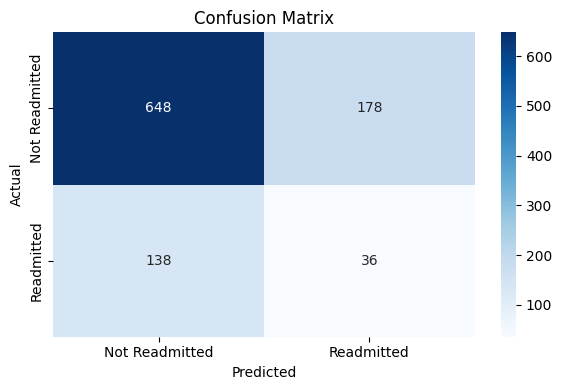

混淆矩陣圖表已保存為 'confusion_matrix.png'


(0.684,
 array([[648, 178],
        [138,  36]], dtype=int64))

<Figure size 640x480 with 0 Axes>

In [40]:
ft_transformer_smote_nc.evaluate_model(model_name='ft_transformer_model_smote_nc.pth')

## Borderline

In [14]:
ft_transformer_borderline = CustomerFTTransformer()
ft_transformer_borderline.format_dataframe()
ft_transformer_borderline.preprocess(use_smote=True, use_under_sampling=False, smote_method='borderline')
ft_transformer_borderline.set_feautres_processed()
ft_transformer_borderline.set_tablar_dataset()
ft_transformer_borderline.set_model_config()

Encoded gender: [0, 1]
Encoded primary_diagnosis: [0, 1, 2, 3, 4]
Encoded discharge_to: [0, 1, 2, 3]
Encoded num_procedures: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Encoded days_in_hospital: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Encoded comorbidity_score: [0, 1, 2, 3, 4]
=== Feature Encoding Complete ===
Numerical features: ['age']
Categorical features (encoded): ['gender', 'primary_diagnosis', 'discharge_to', 'num_procedures', 'days_in_hospital', 'comorbidity_score']

Sample of encoded data:
  gender primary_diagnosis discharge_to num_procedures days_in_hospital  \
0      1                 2            1              1                1   
1      0                 0            2              2               12   
2      1                 1            0              1                6   
3      1                 0            3              9                1   
4      1                 1            2              6                3   

  comorbidity_score  
0                 1  
1      

100%|██████████| 6/6 [00:00<?, ?it/s]

Final train_df_train_csv_processed shape: (6468, 7)
Final test_df_train_csv_processed shape: (1000, 7)
=== END PREPROCESS DEBUG ===
categorical features (cols): ['cat_0', 'cat_1', 'cat_2', 'cat_3', 'cat_4', 'cat_5']
categorical features (array): 6
numerical features (cols): ['num_0']
numerical features (array): 1



c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\ShiShiuan\Desktop\機器學習與人

In [15]:
ft_transformer_borderline.check_class_distribution(ft_transformer_borderline.train_df_train_csv_processed, 'target')

=== Class Distribution Analysis ===
Class distribution:
  Class 0: 3234 samples (50.00%)
  Class 1: 3234 samples (50.00%)
Imbalance ratio: 1.00
✅ Dataset is relatively balanced.


(target
 0    3234
 1    3234
 Name: count, dtype: int64,
 1.0)

In [16]:
ft_transformer_borderline.train_model(num_epochs=500, model_name='ft_transformer_model_borderline.pth', use_class_weight=False)

Using standard CrossEntropyLoss (no class weights)


Model saved as ./models/ft_transformer_model_borderline.pth


Test Accuracy: 0.3870

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.32      0.47       826
           1       0.18      0.68      0.28       174

    accuracy                           0.39      1000
   macro avg       0.50      0.50      0.37      1000
weighted avg       0.72      0.39      0.43      1000


Confusion Matrix:
[[268 558]
 [ 55 119]]

Detailed Confusion Matrix:
Predicted:       0       1
Actual 0:     268     558
Actual 1:      55     119


c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\src\ft_transformer.py:394: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(f"./models/{model_name}

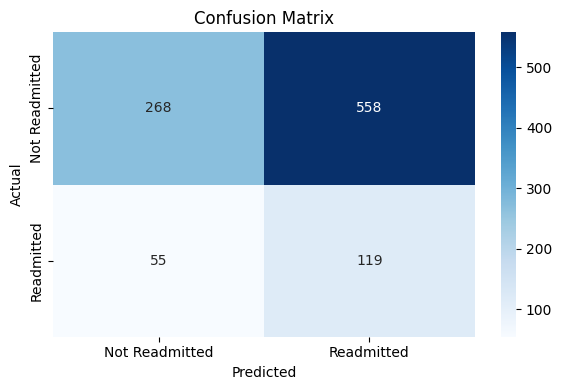

混淆矩陣圖表已保存為 'confusion_matrix.png'


(0.387,
 array([[268, 558],
        [ 55, 119]], dtype=int64))

<Figure size 640x480 with 0 Axes>

In [17]:
ft_transformer_borderline.evaluate_model(model_name='ft_transformer_model_borderline.pth')

# Under Sampling

## Random Under Sampling

In [2]:
ft_transformer_random_under_sampling = CustomerFTTransformer()
ft_transformer_random_under_sampling.format_dataframe()
ft_transformer_random_under_sampling.preprocess(use_under_sampling=True, under_sampling_method='random')
ft_transformer_random_under_sampling.set_feautres_processed()
ft_transformer_random_under_sampling.set_tablar_dataset()
ft_transformer_random_under_sampling.set_model_config()

Encoded gender: [0, 1]
Encoded primary_diagnosis: [0, 1, 2, 3, 4]
Encoded discharge_to: [0, 1, 2, 3]
=== Feature Encoding Complete ===
Numerical features: ['age', 'num_procedures', 'days_in_hospital', 'comorbidity_score']
Categorical features (encoded): ['gender', 'primary_diagnosis', 'discharge_to']

Sample of encoded data:
  gender primary_diagnosis discharge_to
0      1                 2            1
1      0                 0            2
2      1                 1            0
3      1                 0            3
4      1                 1            2
🔄 Applying under sampling with method: random
=== Applying random under sampling ===
Original class distribution: {0: 3234, 1: 766}
Imbalance ratio: 4.22
Applying random under sampling...
=== Under sampling results ===
Final class distribution: {0: 766, 1: 766}
Training set size: 4000 -> 1532
Samples removed: 2468
✅ Under sampling successful using random method
After under sampling - Training set size: 1532 (was 4000)
train_df_tr

100%|██████████| 3/3 [00:00<00:00, 205.91it/s]

Final train_df_train_csv_processed shape: (1532, 7)
Final test_df_train_csv_processed shape: (1000, 7)
=== END PREPROCESS DEBUG ===
categorical features (cols): ['cat_0', 'cat_1', 'cat_2']
categorical features (array): 3
numerical features (cols): ['num_0', 'num_1', 'num_2', 'num_3']
numerical features (array): 4



c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\ShiShiuan\Desktop\機器學習與人

In [6]:
ft_transformer_random_under_sampling.train_df_train_csv_processed

,num_0,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,target
0,-1.315580,0,3,0,7,3,2,1
1,-0.832266,1,3,0,2,7,1,0
2,0.279357,0,4,1,8,2,1,0
3,0.955997,1,4,1,4,3,0,0
4,0.569345,0,1,0,6,5,4,0
...,...,...,...,...,...,...,...,...
1527,0.037700,1,2,2,2,7,4,1
1528,-0.638940,1,0,1,7,11,0,1
1529,-0.977260,0,4,1,6,7,4,1
1530,-0.397283,1,1,3,2,0,4,1


In [7]:
ft_transformer_random_under_sampling.check_class_distribution(ft_transformer_random_under_sampling.train_df_train_csv_processed, 'target')

=== Class Distribution Analysis ===
Class distribution:
  Class 0: 766 samples (50.00%)
  Class 1: 766 samples (50.00%)
Imbalance ratio: 1.00
✅ Dataset is relatively balanced.


(target
 0    766
 1    766
 Name: count, dtype: int64,
 1.0)

In [9]:
ft_transformer_random_under_sampling.train_model(num_epochs=500, model_name='ft_transformer_model_random_under_sampling.pth', use_class_weight=False)

Using standard CrossEntropyLoss (no class weights)


Model saved as ./models/ft_transformer_model_random_under_sampling.pth


Test Accuracy: 0.7400

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       826
           1       0.24      0.22      0.23       174

    accuracy                           0.74      1000
   macro avg       0.54      0.54      0.54      1000
weighted avg       0.73      0.74      0.74      1000


Confusion Matrix:
[[701 125]
 [135  39]]

Detailed Confusion Matrix:
Predicted:       0       1
Actual 0:     701     125
Actual 1:     135      39


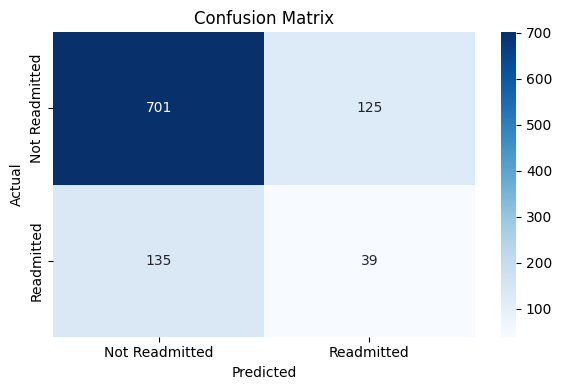

混淆矩陣圖表已保存為 'confusion_matrix.png'


(0.74,
 array([[701, 125],
        [135,  39]], dtype=int64))

<Figure size 640x480 with 0 Axes>

In [12]:
ft_transformer_random_under_sampling.evaluate_model(model_name='ft_transformer_model_random_under_sampling.pth')

## Tomek

In [4]:
ft_transformer_tomek_under_sampling = CustomerFTTransformer()
ft_transformer_tomek_under_sampling.format_dataframe()
ft_transformer_tomek_under_sampling.preprocess(use_smote=True, use_under_sampling=True, smote_method='smotenc', under_sampling_method='tomek')
ft_transformer_tomek_under_sampling.set_feautres_processed()
ft_transformer_tomek_under_sampling.set_tablar_dataset()
ft_transformer_tomek_under_sampling.set_model_config()

Encoded gender: [0, 1]
Encoded primary_diagnosis: [0, 1, 2, 3, 4]
Encoded discharge_to: [0, 1, 2, 3]
=== Feature Encoding Complete ===
Numerical features: ['age', 'num_procedures', 'days_in_hospital', 'comorbidity_score']
Categorical features (encoded): ['gender', 'primary_diagnosis', 'discharge_to']

Sample of encoded data:
  gender primary_diagnosis discharge_to
0      1                 2            1
1      0                 0            2
2      1                 1            0
3      1                 0            3
4      1                 1            2
Applying Under Sampling using: tomek, then applying SMOTE using: smotenc
🔄 Applying under sampling with method: tomek
=== Applying tomek under sampling ===
Original class distribution: {0: 3234, 1: 766}
Imbalance ratio: 4.22
Applying tomek under sampling...
Attempting Tomek Links under sampling...
After Tomek Links: 3656 samples
Removed 344 samples
New class distribution: {0: 2890, 1: 766}
=== Under sampling results ===
Final cla

100%|██████████| 3/3 [00:00<00:00, 191.93it/s]

Final train_df_train_csv_processed shape: (5780, 7)
Final test_df_train_csv_processed shape: (1000, 7)
=== END PREPROCESS DEBUG ===
categorical features (cols): ['cat_0', 'cat_1', 'cat_2']
categorical features (array): 3
numerical features (cols): ['num_0', 'num_1', 'num_2', 'num_3']
numerical features (array): 4



c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\ShiShiuan\Desktop\機器學習與人

In [5]:
ft_transformer_tomek_under_sampling.check_class_distribution(ft_transformer_tomek_under_sampling.train_df_train_csv_processed, 'target')

=== Class Distribution Analysis ===
Class distribution:
  Class 0: 2890 samples (50.00%)
  Class 1: 2890 samples (50.00%)
Imbalance ratio: 1.00
✅ Dataset is relatively balanced.


(target
 0    2890
 1    2890
 Name: count, dtype: int64,
 1.0)

In [10]:
ft_transformer_tomek_under_sampling.train_df_train_csv_processed

,num_0,num_1,num_2,num_3,cat_0,cat_1,cat_2,target
0,-0.990645,-0.867915,1.410351,-1.428785,1,1,2,0
1,0.863032,-0.867915,-0.856877,-0.722811,1,3,1,1
2,-0.450682,0.670448,-1.108791,-0.492910,0,4,2,1
3,-0.847568,-1.474177,0.076395,1.395110,0,1,0,1
4,0.424003,-0.512277,1.662265,0.689136,1,3,3,0
...,...,...,...,...,...,...,...,...
5775,-1.084300,0.067085,-1.062071,1.395110,0,4,3,1
5776,-1.529753,0.461136,-0.114137,-0.908414,0,3,2,1
5777,-0.348699,-1.579189,0.616123,-1.428785,1,2,3,1
5778,-0.303593,1.621546,1.239221,-0.722811,0,2,3,1


In [14]:
ft_transformer_tomek_under_sampling.train_model(num_epochs=500, model_name='ft_transformer_model_tomek_under_sampling.pth', use_class_weight=True)

Using current (post-sampling) data distribution for class weight computation
Current class distribution: {0: 2890, 1: 2890}
Class 0: weight = 1.0000
Class 1: weight = 1.0000
Original class distribution (for reference): {0: 3234, 1: 766}
Using class weights: [1. 1.]


Model saved as ./models/ft_transformer_model_tomek_under_sampling.pth


Test Accuracy: 0.5880

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.63      0.72       826
           1       0.18      0.40      0.25       174

    accuracy                           0.59      1000
   macro avg       0.51      0.51      0.48      1000
weighted avg       0.72      0.59      0.63      1000


Confusion Matrix:
[[519 307]
 [105  69]]

Detailed Confusion Matrix:
Predicted:       0       1
Actual 0:     519     307
Actual 1:     105      69


c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\src\ft_transformer.py:386: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(f"./models/{model_name}

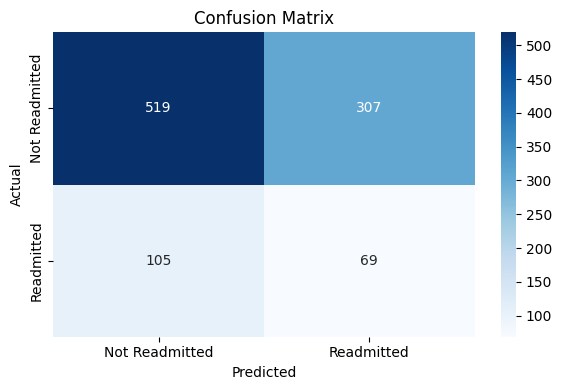

混淆矩陣圖表已保存為 'confusion_matrix.png'


(0.588,
 array([[519, 307],
        [105,  69]], dtype=int64))

<Figure size 640x480 with 0 Axes>

In [15]:
ft_transformer_tomek_under_sampling.evaluate_model(model_name='ft_transformer_model_tomek_under_sampling.pth')

## ENN

In [3]:
ft_transformer_enn_under_sampling = CustomerFTTransformer()
ft_transformer_enn_under_sampling.format_dataframe()
ft_transformer_enn_under_sampling.preprocess(use_under_sampling=True, under_sampling_method='enn')
ft_transformer_enn_under_sampling.set_feautres_processed()
ft_transformer_enn_under_sampling.set_tablar_dataset()
ft_transformer_enn_under_sampling.set_model_config()

Encoded gender: [0, 1]
Encoded primary_diagnosis: [0, 1, 2, 3, 4]
Encoded discharge_to: [0, 1, 2, 3]
Encoded num_procedures: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Encoded days_in_hospital: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Encoded comorbidity_score: [0, 1, 2, 3, 4]
=== Feature Encoding Complete ===
Numerical features: ['age']
Categorical features (encoded): ['gender', 'primary_diagnosis', 'discharge_to', 'num_procedures', 'days_in_hospital', 'comorbidity_score']

Sample of encoded data:
  gender primary_diagnosis discharge_to num_procedures days_in_hospital  \
0      1                 2            1              1                1   
1      0                 0            2              2               12   
2      1                 1            0              1                6   
3      1                 0            3              9                1   
4      1                 1            2              6                3   

  comorbidity_score  
0                 1  
1      

100%|██████████| 6/6 [00:00<?, ?it/s]

Final train_df_train_csv_processed shape: (2471, 7)
Final test_df_train_csv_processed shape: (1000, 7)
=== END PREPROCESS DEBUG ===
categorical features (cols): ['cat_0', 'cat_1', 'cat_2', 'cat_3', 'cat_4', 'cat_5']
categorical features (array): 6
numerical features (cols): ['num_0']
numerical features (array): 1



c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\ShiShiuan\Desktop\機器學習與人

In [4]:
ft_transformer_enn_under_sampling.train_df_train_csv_processed

,num_0,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,target
0,0.585107,0,1,2,8,12,4,0
1,-0.734232,1,0,3,1,4,1,1
2,-1.027418,1,1,2,6,12,0,1
3,-0.050130,1,2,2,3,2,0,0
4,-0.392181,0,1,3,2,0,2,0
...,...,...,...,...,...,...,...,...
2466,0.389650,1,3,0,4,10,4,0
2467,-0.196723,0,2,0,0,6,2,0
2468,-0.392181,0,1,0,3,3,4,0
2469,-1.711519,0,3,3,1,10,2,0


In [5]:
ft_transformer_enn_under_sampling.check_class_distribution(ft_transformer_enn_under_sampling.train_df_train_csv_processed, 'target')

=== Class Distribution Analysis ===
Class distribution:
  Class 0: 1705 samples (69.00%)
  Class 1: 766 samples (31.00%)
Imbalance ratio: 2.23
⚠️  Dataset is imbalanced.


(target
 0    1705
 1     766
 Name: count, dtype: int64,
 2.2258485639686683)

In [6]:
ft_transformer_enn_under_sampling.train_model(num_epochs=500, model_name='ft_transformer_model_enn_under_sampling.pth', use_class_weight=True)

Using current (post-sampling) data distribution for class weight computation
Current class distribution: {0: 1705, 1: 766}
Class 0: weight = 0.7246
Class 1: weight = 1.6129
Original class distribution (for reference): {0: 3234, 1: 766}
Using class weights: [0.72463346 1.6129243 ]


Model saved as ./models/ft_transformer_model_enn_under_sampling.pth


c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\src\ft_transformer.py:394: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(f"./models/{model_name}

Test Accuracy: 0.4030

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.36      0.50       826
           1       0.17      0.60      0.26       174

    accuracy                           0.40      1000
   macro avg       0.49      0.48      0.38      1000
weighted avg       0.70      0.40      0.46      1000


Confusion Matrix:
[[298 528]
 [ 69 105]]

Detailed Confusion Matrix:
Predicted:       0       1
Actual 0:     298     528
Actual 1:      69     105


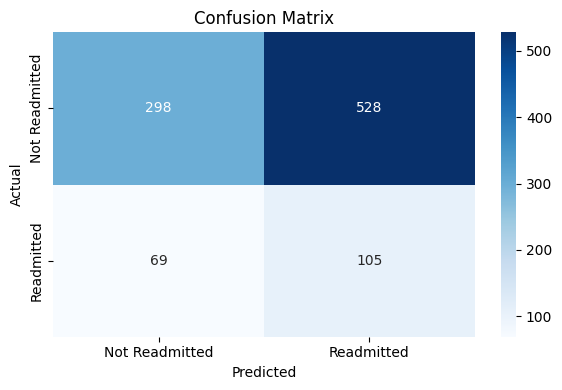

混淆矩陣圖表已保存為 'confusion_matrix.png'


(0.403,
 array([[298, 528],
        [ 69, 105]], dtype=int64))

<Figure size 640x480 with 0 Axes>

In [7]:
ft_transformer_enn_under_sampling.evaluate_model(model_name='ft_transformer_model_enn_under_sampling.pth')

# Class Weight

In [6]:
ft_transformer_class_weight = CustomerFTTransformer()
ft_transformer_class_weight.format_dataframe()
ft_transformer_class_weight.preprocess()
ft_transformer_class_weight.set_feautres_processed()
ft_transformer_class_weight.set_tablar_dataset()
ft_transformer_class_weight.set_model_config()

Encoded gender: [0, 1]
Encoded primary_diagnosis: [0, 1, 2, 3, 4]
Encoded discharge_to: [0, 1, 2, 3]
=== Feature Encoding Complete ===
Numerical features: ['age', 'num_procedures', 'days_in_hospital', 'comorbidity_score']
Categorical features (encoded): ['gender', 'primary_diagnosis', 'discharge_to']

Sample of encoded data:
  gender primary_diagnosis discharge_to
0      1                 2            1
1      0                 0            2
2      1                 1            0
3      1                 0            3
4      1                 1            2
=== PREPROCESS DEBUG INFO ===
Before sampling - Training set size: 4000
Before sampling - Class distribution: {0: 3234, 1: 766}
Before sampling - X_num_train shape: (4000, 4)
Before sampling - X_cat_train shape: (4000, 3)
📝 No sampling method applied
train_df_train_csv shape after DataFrame creation: (4000, 8)


100%|██████████| 3/3 [00:00<?, ?it/s]

Final train_df_train_csv_processed shape: (4000, 7)
Final test_df_train_csv_processed shape: (1000, 7)
=== END PREPROCESS DEBUG ===
categorical features (cols): ['cat_0', 'cat_1', 'cat_2']
categorical features (array): 3
numerical features (cols): ['num_0', 'num_1', 'num_2', 'num_3']
numerical features (array): 4



c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\ShiShiuan\Desktop\機器學習與人

In [7]:
ft_transformer_class_weight.check_class_distribution(ft_transformer_class_weight.train_df_train_csv_processed, 'target')

=== Class Distribution Analysis ===
Class distribution:
  Class 0: 3234 samples (80.85%)
  Class 1: 766 samples (19.15%)
Imbalance ratio: 4.22
⚠️  Dataset is imbalanced.


(target
 0    3234
 1     766
 Name: count, dtype: int64,
 4.221932114882507)

In [10]:
ft_transformer_class_weight.train_model(num_epochs=100, model_name='ft_transformer_model_class_weight.pth', use_class_weight=True)

Using current (post-sampling) data distribution for class weight computation
Current class distribution: {0: 3234, 1: 766}
Class 0: weight = 0.6184
Class 1: weight = 2.6110
Original class distribution (for reference): {0: 3234, 1: 766}
Using class weights: [0.6184292 2.610966 ]


Model saved as ./models/ft_transformer_model_class_weight.pth


Test Accuracy: 0.6090

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.67      0.74       826
           1       0.16      0.30      0.21       174

    accuracy                           0.61      1000
   macro avg       0.49      0.49      0.48      1000
weighted avg       0.71      0.61      0.65      1000


Confusion Matrix:
[[557 269]
 [122  52]]

Detailed Confusion Matrix:
Predicted:       0       1
Actual 0:     557     269
Actual 1:     122      52


c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\src\ft_transformer.py:394: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(f"./models/{model_name}

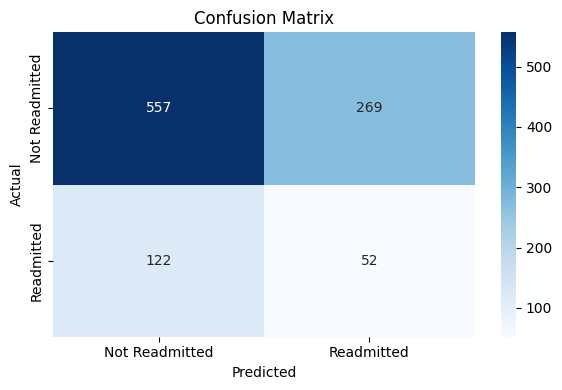

混淆矩陣圖表已保存為 'confusion_matrix.png'


(0.609,
 array([[557, 269],
        [122,  52]], dtype=int64))

<Figure size 640x480 with 0 Axes>

In [11]:
ft_transformer_class_weight.evaluate_model(model_name='ft_transformer_model_class_weight.pth')